<a href="https://colab.research.google.com/github/johnathanacortesd/Diplomado_Ciencia_Datos/blob/main/Proyecto_Zero_shot_clasificador_noticias_beto_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Zero-shot clasificación de textos beto-sentiment-analysis

## Instalar las dependencias.



In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.6 MB/s eta 0:00:00


## Cargar el archivo XLSX desde el almacenamiento de sesión

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm

# Cargar el archivo XLSX desde el almacenamiento de sesión con barra de progreso
from google.colab import files
uploaded = files.upload()
EXCEL_FILENAME = next(iter(uploaded))
EXCEL_PATH = './' + EXCEL_FILENAME

# Leer el archivo Excel
df = pd.read_excel(EXCEL_PATH)

# Cargar el tokenizer y el modelo
tokenizer = AutoTokenizer.from_pretrained("finiteautomata/beto-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/beto-sentiment-analysis")

# Función para analizar el sentimiento de un texto
def analyze_sentiment(text):
    encoding = tokenizer(text, truncation=True, padding=True, return_tensors="pt")
    logits = model(**encoding).logits
    predicted_class = logits.argmax().item()
    sentiment_classes = ["Negativo", "Neutro", "Positivo"]
    sentiment = sentiment_classes[predicted_class]
    return sentiment

# Analizar sentimiento para cada resumen en el DataFrame con barra de progreso
tqdm.pandas(desc="Analizando sentimiento")
df["Sentimiento"] = df["Resumen"].progress_apply(analyze_sentiment)

# Crear un DataFrame con las columnas "Resumen" y "Sentimiento"
df_results = df[["Resumen", "Sentimiento"]]

# Guardar los resultados en un nuevo archivo Excel
output_filename = "resultados_sentimiento.xlsx"
df_results.to_excel(output_filename, index=False)
print(f"Resultados de sentimiento guardados en {output_filename}")


Saving sae.xlsx to sae.xlsx


Analizando sentimiento: 100%|██████████| 259/259 [01:45<00:00,  2.46it/s]

Resultados de sentimiento guardados en resultados_sentimiento.xlsx



## Gráfica con los resultados

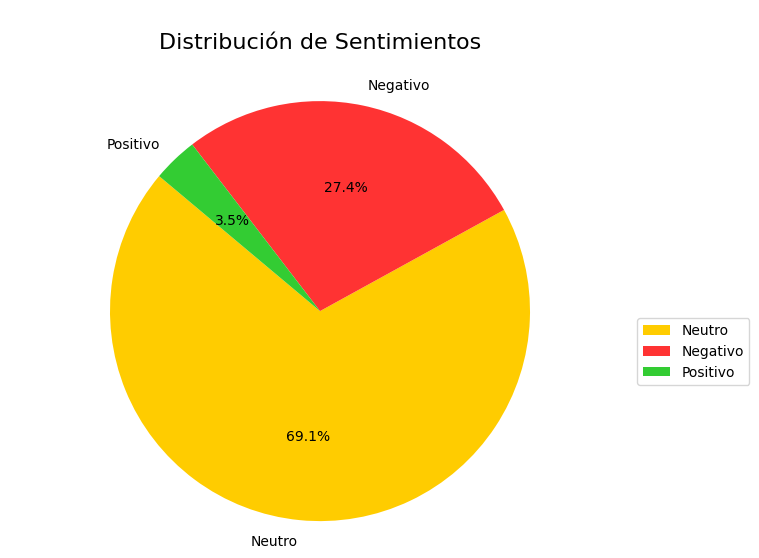

In [ ]:
import matplotlib.pyplot as plt

# Contar la cantidad de cada sentimiento
sentiment_counts = df_results["Sentimiento"].value_counts()

colors = ['#ffcc00', '#ff3333', '#33cc33']

# Etiquetas y colores para cada sentimiento
labels = sentiment_counts.index
colors = colors[:len(labels)]

# Crear una gráfica de pastel con porcentajes y etiquetas
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("\nDistribución de Sentimientos\n", loc="center", fontsize=16)  # Título centrado y con espacio
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Agregar leyenda con los colores personalizados
plt.legend(labels, loc="best", bbox_to_anchor=(1, 0.5))

plt.show()

---

@misc{perez2021pysentimiento,
      title={pysentimiento: A Python Toolkit for Sentiment Analysis and SocialNLP tasks},
      author={Juan Manuel Pérez and Juan Carlos Giudici and Franco Luque},
      year={2021},
      eprint={2106.09462},
      archivePrefix={arXiv},
      primaryClass={cs.CL}
}

@article{canete2020spanish,
  title={Spanish pre-trained bert model and evaluation data},
  author={Ca{\~n}ete, Jos{\'e} and Chaperon, Gabriel and Fuentes, Rodrigo and Ho, Jou-Hui and Kang, Hojin and P{\'e}rez, Jorge},
  journal={Pml4dc at iclr},
  volume={2020},
  number={2020},
  pages={1--10},
  year={2020}
}
